In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from sklearn.metrics import accuracy_score

In [43]:
from sklearn.tree import plot_tree

[Text(0.46308210784313725, 0.9642857142857143, 'x[1] <= 0.208\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.16819852941176472, 0.8928571428571429, 'x[7] <= -0.383\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.315640318627451, 0.9285714285714286, 'True  '),
 Text(0.058823529411764705, 0.8214285714285714, 'x[5] <= -0.134\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0196078431372549, 0.75, 'x[6] <= 0.603\ngini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.00980392156862745, 0.6785714285714286, 'gini = 0.0\nsamples = 108\nvalue = [108, 0]'),
 Text(0.029411764705882353, 0.6785714285714286, 'x[6] <= 0.646\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.0196078431372549, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0392156862745098, 0.6071428571428571, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.09803921568627451, 0.75, 'x[2] <= -1.752\ngini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.0882352941

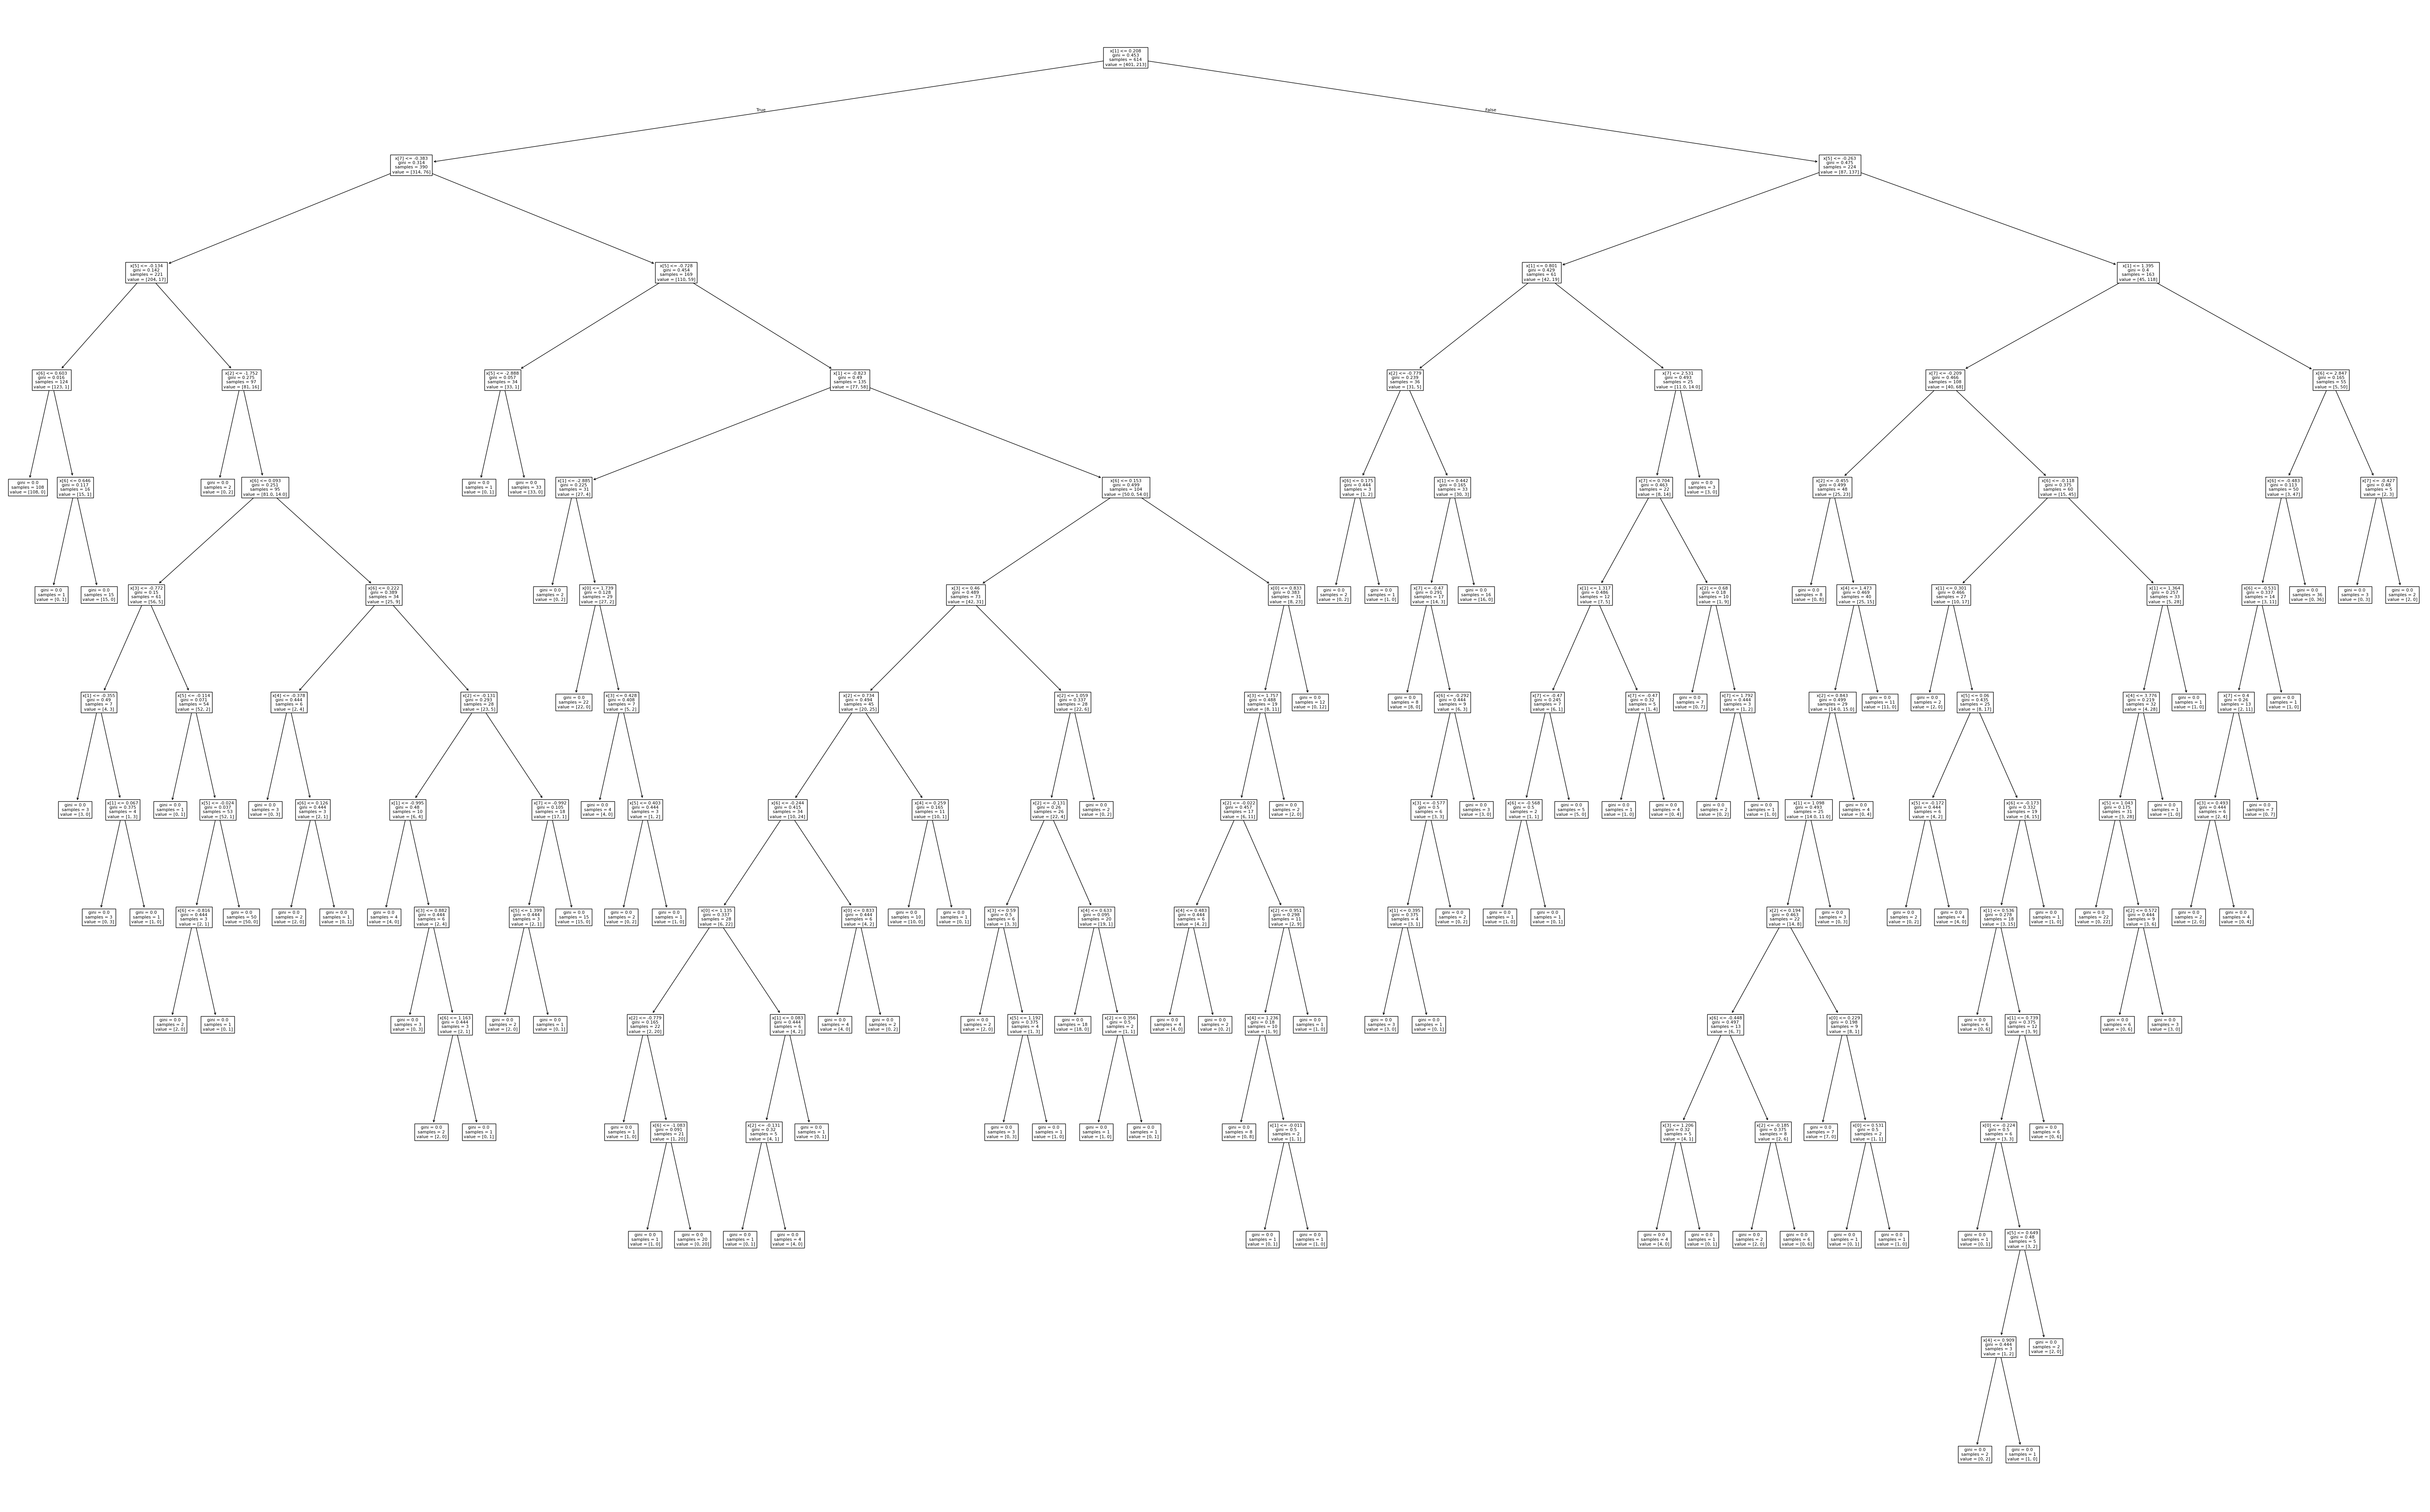

In [74]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=80,50
plot_tree(clf)

In [49]:
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\diabetes.csv')

In [46]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [90]:
X=df.iloc[:,0:-1]

In [91]:
y=df.iloc[:,-1]

In [92]:
from sklearn.preprocessing import StandardScaler


In [93]:
scaler=StandardScaler()

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [95]:
X_train =scaler.fit_transform(X_train)

In [96]:
X_test=scaler.transform(X_test)

In [97]:
clf1=DecisionTreeClassifier()

In [67]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
y_pred=clf1.predict(X_test)

In [69]:
accuracy_score(y_test,y_pred)

0.7272727272727273

In [99]:
param={
    "criterion":['ginni','entropy'],
    "max_depth":[1,2,3,4,5,6,None]
    
    
}

In [98]:
from sklearn.model_selection import GridSearchCV

In [100]:
grid=GridSearchCV(clf1,param_grid=param,cv=10,n_jobs=-1)

In [101]:
grid.fit(X_train,y_train)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.p

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, None]})

In [102]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [103]:
grid.best_score_

0.7523268112109995